In [1]:
import sklearn
from sklearn import svm
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('svm_multiple_train.csv')
x_train = train_data.loc[:,['x1','x2']]
y_train = train_data['x3']

clf = svm.SVC(gamma=0.01, C=100)

clf.fit(x_train, y_train)

joblib.dump(clf,'svm_multiple.learn')

['svm_multiple.learn']

In [3]:
test_data = pd.read_csv('svm_multiple_test.csv')
x_test = test_data.loc[:,['x1','x2']].values
y_test = test_data['x3'].values

clf2 = joblib.load('svm_multiple.learn') 

predict_y = clf2.predict(x_test)

print(y_test)
print('検証結果：', predict_y)

acc_counts = 0

for i in range(len(y_test)):
    if predict_y[i] == y_test[i]:
        acc_counts += 1
    else :
        pass

acc = acc_counts/len(y_test)

print('accuracy：', acc)

[0 0 1 2 0 2 2 2 0 1 0]
検証結果： [0 0 1 2 1 2 2 2 0 1 0]
accuracy： 0.9090909090909091


In [4]:
print(x_test)
print(y_test)

print(x_test.shape)
print(y_test.shape)

print(x_test.T.shape)
print(x_test.T[0])

[[ 1  1]
 [ 3  2]
 [ 4  7]
 [ 6 33]
 [ 7  2]
 [10  9]
 [21  0]
 [55  1]
 [ 5  2]
 [ 8  3]
 [ 3  3]]
[0 0 1 2 0 2 2 2 0 1 0]
(11, 2)
(11,)
(2, 11)
[ 1  3  4  6  7 10 21 55  5  8  3]


In [5]:
x1 = np.linspace(0,60,100)
x2 = np.linspace(0,60,100)

X1, X2 = np.meshgrid(x1,x2)
plot_X = np.c_[X1.ravel(),X2.ravel()]

plot_y = clf2.predict(plot_X)

print(plot_X.shape)
print(plot_X.T.shape)

(10000, 2)
(2, 10000)


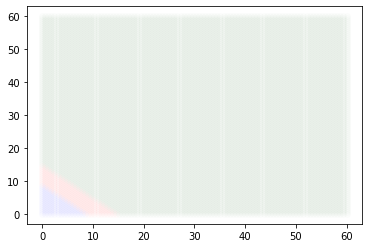

In [6]:
plt.figure()
ax = plt.axes()

plt.scatter(plot_X.T[0][plot_y == 0],plot_X.T[1][plot_y==0], marker = 'o', label = '0',color = 'blue',alpha = 0.01)
plt.scatter(plot_X.T[0][plot_y == 1],plot_X.T[1][plot_y==1], marker = 'o', label = '1',color = 'red',alpha = 0.01)
plt.scatter(plot_X.T[0][plot_y == 2],plot_X.T[1][plot_y==2], marker = 'o', label = '2',color = 'green',alpha = 0.01)



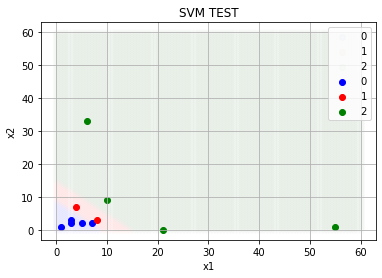

In [7]:
plt.figure()
ax = plt.axes()

plt.scatter(plot_X.T[0][plot_y == 0],plot_X.T[1][plot_y==0], marker = 'o', label = '0',color = 'blue',alpha = 0.01)
plt.scatter(plot_X.T[0][plot_y == 1],plot_X.T[1][plot_y==1], marker = 'o', label = '1',color = 'red',alpha = 0.01)
plt.scatter(plot_X.T[0][plot_y == 2],plot_X.T[1][plot_y==2], marker = 'o', label = '2',color = 'green',alpha = 0.01)


plt.scatter(x_test.T[0][y_test == 0], x_test.T[1][y_test == 0], marker='o', label="0", color="blue", alpha=1.0)
plt.scatter(x_test.T[0][y_test == 1], x_test.T[1][y_test == 1], marker='o', label="1", color="red", alpha=1.0)
plt.scatter(x_test.T[0][y_test == 2], x_test.T[1][y_test == 2], marker='o', label="2", color="green", alpha=1.0)

plt.legend(loc=1)           
plt.title('SVM TEST')   #
plt.xlabel('x1')          
plt.ylabel('x2')            

plt.grid()                              # グリッドの表示

plt.show()